# ConvNeXT + ArcFace

Импортируем необходимые библиотеки и определяем константы:

In [1]:
from dataset import init_dataloaders
from train import train, validate

train_path = r'data\train.lmdb'
test_path = r'data\test.lmdb'
gt_path = r'data\gt.txt'
pred_path = 'pred.txt'

Обучаем сеть:

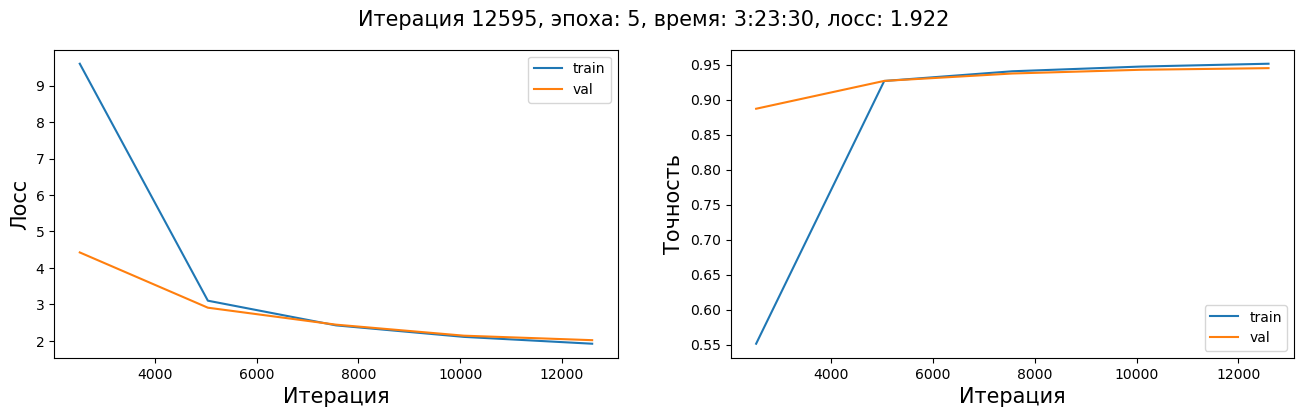

In [2]:
model, vocabulary = train(train_path, lr=0.01, epochs=5, checkpoint_path=r'workdirs\arcface_v3')

Оцениваем модель на тестовой выборке и сохраняем результат:

In [3]:
test_dataloader = init_dataloaders(test_path, split_set=False)
_, _, preds = validate(test_dataloader, model, return_pred=True)

  0%|          | 0/759 [00:00<?, ?it/s]

In [4]:
with open(pred_path, 'w', encoding='utf-8') as f_pred:
    for idx, pred in enumerate(preds):
        name = test_dataloader.dataset.helper.namelist[idx]
        cls = vocabulary.class_by_index(pred)
        print(name, cls, file=f_pred)

In [5]:
!python -m course_ocr_t2.evaluate

Accuracy = 0.9333
